In [ ]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

---
#### CS 260 Final Project - SP23
---

# NBA Team Statistics 1997-2022






By: Brendan Hasara, Matthew Chylack, Travis Kerr


---

## 1. Introduction

For our final project, we explored data which consisted of statistics from the National Basketball Association (NBA). Our data was pulled from data.world, and consists of statistics from the 1997-1998 season up until 2021-2022, and the dataset consists of 725 rows and 22 columns. Our project will answer questions which relate to changes that have taken place over the years in the NBA. We will be inlcuding a join with another dataset which has additional data on NBA player salaries.

Questions:


1.   How has the average number of points scored/game changed by year?
2.   Does defense really win championships?
3.   How has the number of personal fouls per game changed with year? Has the number of personal fouls per game been part of the cause for the increase in average points scored per game?
4.   Has there been an increase in the number of 3-pointers made per game? What were each team's 3 point percentage and 3 pointer's attemtped and made per game?
5.   For each year of the dataset, what teams had the highest average points per game that season and what was their offensive efficiency? Then, find what teams had the lowest average points per game that season and what was their offensive efficiency?
6.   Does money buy wins?



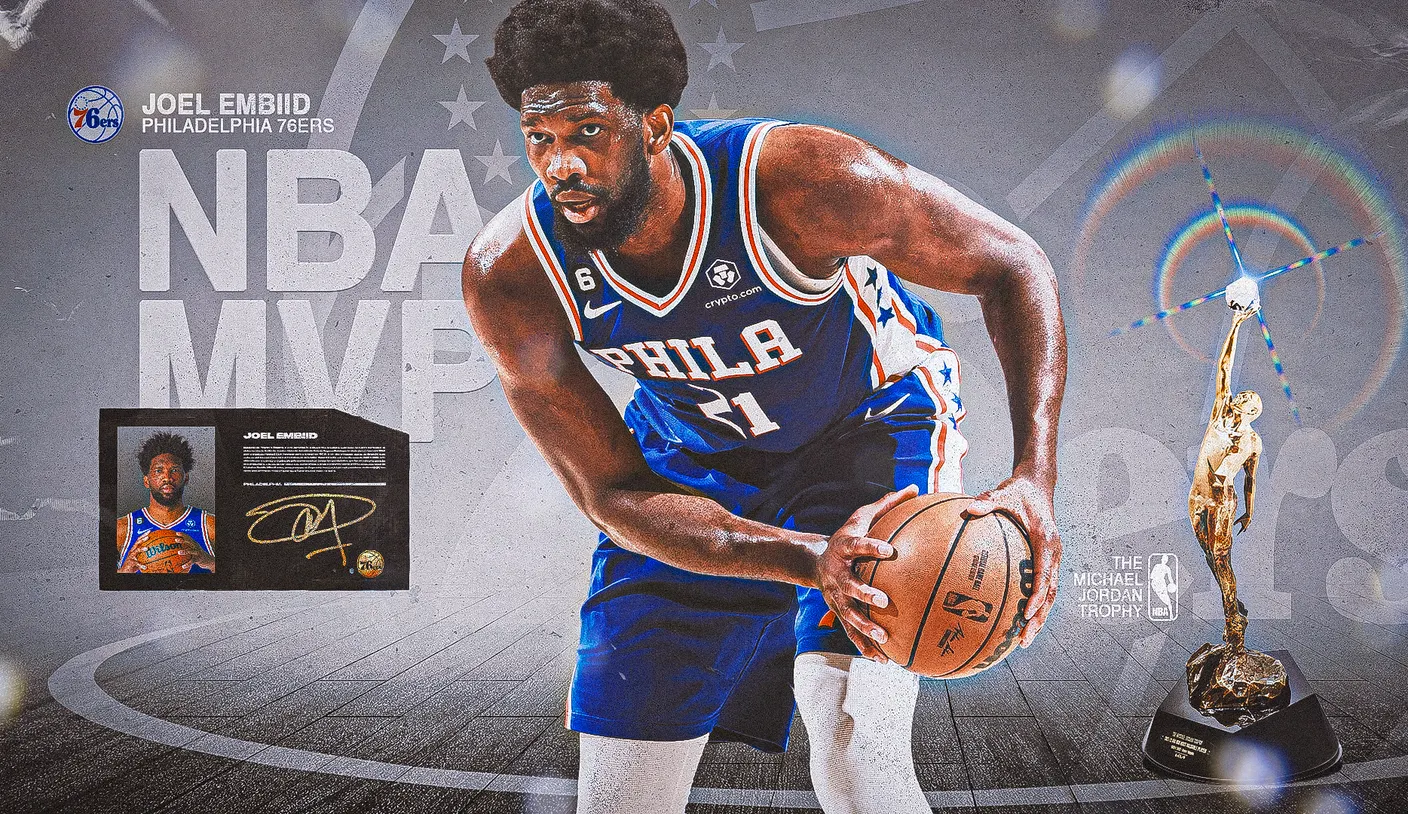

---

## 2. Data

A direct link to the data can be found at the following website.
 * https://data.world/etocco/nba-team-stats/workspace/file?filename=NBA_Team_Stats.csv

 https://data.world/datadavis/nba-salaries


In [ ]:
#In this cell, we load the data.
try:
    #load your csv data from github.
    csv_data_bb = pd.read_csv("https://raw.githubusercontent.com/MattChylack/Basketball/main/CLEANNBA_Team_Stats%20(1).csv")
    #load your csv data from github.
    csv_data_sal = pd.read_csv("https://raw.githubusercontent.com/BHasara/salary/main/salaries_1997-2017%20join.csv")

    #Connect to a database - use a different name for your db than "example"
    conn = sql.connect('basketball.db')

    #Load the csv data into a table using the connection to the db
    #that you just created in the previous line.
    csv_data_bb.to_sql('basketball', conn, index = False)
    csv_data_sal.to_sql('salary', conn, index = False)

except ValueError:
    print("""A ValueError occurred. If you've run this cell twice,
             then you're likely getting the error because the DB was created the first time
             and Python doesn't want to overwrite it the second time.""")

In [ ]:
sql_statement = """SELECT *
                   FROM basketball"""

results = pd.read_sql_query(sql_statement, conn)
results

,no,team,g,min,pts,reb,ast,stl,blk,to,...,oreb,fgm_a,pct,3gm_a,pct.1,ftm_a,pct.2,eff,dff,year
0,1,Chicago,103,48.4,96.0,44.1,23.1,8.6,4.3,13.0,...,14.9,36.7-81.7,0.449,3.9-12.0,0.323,18.7-25.2,0.741,111.6,17.5,1997-1998
1,2,Utah,102,48.3,98.6,40.8,24.7,7.6,4.8,14.7,...,11.3,35.9-74.3,0.483,3.1-8.4,0.368,23.8-30.9,0.768,116.3,17.5,1997-1998
2,3,Phoenix,86,48.6,99.3,41.9,25.6,9.2,5.3,14.4,...,12.1,38.2-82.0,0.466,5.2-14.7,0.355,17.7-23.6,0.747,117.1,13.6,1997-1998
3,4,L.A.Lakers,95,48.3,104.8,42.9,24.3,8.7,6.8,14.7,...,13.2,38.0-79.1,0.480,6.1-17.3,0.350,22.8-33.7,0.675,120.8,13.2,1997-1998
4,5,San Antonio,91,48.4,92.5,44.1,21.9,6.2,6.9,15.3,...,11.9,35.1-75.1,0.468,3.7-10.8,0.344,18.5-26.8,0.688,108.0,13.1,1997-1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,26,Orlando,82,48.2,104.2,44.3,23.7,6.8,4.5,13.8,...,9.1,38.3-88.3,0.434,12.2-36.8,0.331,15.5-19.7,0.787,115.5,-16.0,2021-2022
739,27,Detroit,82,48.2,104.8,43.0,23.5,7.7,4.8,13.4,...,11.0,38.2-88.6,0.430,11.3-34.6,0.326,17.2-22.0,0.782,115.1,-16.7,2021-2022
740,28,Portland,82,48.1,106.2,42.9,22.9,8.0,4.5,13.7,...,10.4,38.5-87.1,0.443,12.7-36.8,0.346,16.4-21.6,0.760,117.1,-19.0,2021-2022
741,29,Oklahoma City,82,48.3,103.7,45.6,22.2,7.6,4.6,13.3,...,10.4,38.3-89.1,0.430,12.1-37.4,0.323,15.0-19.9,0.756,114.8,-19.2,2021-2022


In [ ]:
sql_statement = """SELECT *
                   FROM salary
                   WHERE team = "Los Angeles Clippers"
                """

results = pd.read_sql_query(sql_statement, conn)
results

,league,player_id,salary,season,season_end,season_start,team
0,NBA,ackeral01,711517,2008-09,2009,2008,Los Angeles Clippers
1,NBA,adamsha01,297163,2008-09,2009,2008,Los Angeles Clippers
2,NBA,aguirma01,150000,1993-94,1994,1993,Los Angeles Clippers
3,NBA,aldrico01,1100600,2015-16,2016,2015,Los Angeles Clippers
4,NBA,aminual01,2563320,2010-11,2011,2010,Los Angeles Clippers
...,...,...,...,...,...,...,...
498,NBA,wrighlo02,1480000,1996-97,1997,1996,Los Angeles Clippers
499,NBA,wrighlo02,1701720,1997-98,1998,1997,Los Angeles Clippers
500,NBA,wrighlo02,1923000,1998-99,1999,1998,Los Angeles Clippers
501,NBA,zhizhwa01,1900000,2002-03,2003,2002,Los Angeles Clippers


### 2.1 Summary of Variables within the Basketball Table

The basketball table has 22 columns/variables and 725 rows.  All variables are explained in this section.

Note that the table was read in from a csv, but had we created a formal SQLite database for the table, the schema would have been as follows.

```
CREATE TABLE "basketball" (
        "no" INTEGER,
        "team" TEXT,
        "g" INTEGER,
        "min" REAL,
        "pts" REAL,
        "reb" REAL,
        "ast" REAL,
        "stl" REAL,
        "blk" REAL,
        "to" REAL,
        "pf" REAL,
        "dreb" REAL,
        "oreb" REAL,
        "fgm_a" REAL,
        "pct" REAL,
        "3gm_a" REAL,
        "pct_3" REAL,
        "ftm_a" REAL,
        "pct_F" REAL,
        "eff" REAL,
        "dff" REAL,
        "year" Integer

        "
       
        
        PRIMARY KEY("team","year")
);
```

Here are the variables, their descriptions, their units, their types, and some descriptive statistics.

* **no** – No of team from statistically best to worst.
    * Number of missing values: 0
    * Contains 30 distinct values:
        * 1-30, giving a number to an NBA team depending on how statistically good they are.  

* **team** – NBA team.
    * Number of missing values: 0
    * Units: if necessary; delete otherwise.
    * Contains 33 distinct values:
        * Golden State Warriors, Miami Heat, Cleveland Caveliers, etc. Includes 3 teams that are disbanded or currently have changed names.  

* **year** – Season of NBA team.
    * Number of missing values: 0
    * Units: if necessary; delete otherwise.
    * Contains 25 distinct values:
        * From NBA season 1997-1998 to 2021-2022

* **g** – Number of games played in season
    * Number of missing values: 0
    * Units: Games per season (including playoff games, not including pre-season).
    * max value: 108
    * min value: 50
    * average value: 84.66069

* **min** – Number of minutes
    * Number of missing values: 0
    * Units: Minutes per game.
    * max value: 49
    * min value: 20
    * average value: 46.081517

* **pts** – Average points per game.
    * Number of missing values: 0
    * Units: Team points per game.
    * max value: 117.8
    * min value: 81.9
    * average value: 100.309379

* **reb** – Average rebounds per game.
    * Number of missing values: 0
    * Units: Team rebounds per game.
    * max value: 51.1
    * min value: 35.8
    * average value: 42.576828

* **ast** – Average assists per game
    * Number of missing values: 0
    * Units: Team assists per game.
    * max value: 30.0
    * min value: 15.4
    * average value: 22.051724

* **stl** – Average steals per game.
    * Number of missing values: 0
    * Units: Team steals per game.
    * max value: 12.0
    * min value: 5.5
    * average value: 7.641241

* **blk** – Average blocks per game.
    * Number of missing values: 0
    * Units: Team blocks per game.
    * max value: 8.1
    * min value: 2.5
    * average value: 4.909517

* **to** – Average turnovers per game.
    * Number of missing values: 0
    * Units: Team turnovers per game.
    * max value: 17.5
    * min value: 10.8
    * average value: 13.836828

* **pf** – Average personal fouls per game.
    * Number of missing values: 0
    * Units: Team personal fouls per game.
    * max value: 27.1
    * min value: 16.6
    * average value: 21.174345

* **dreb** – Average defensive rebounds per game.
    * Number of missing values: 0
    * Units: Team defensive rebounds per game.
    * max value: 41.7
    * min value: 24.9
    * average value: 31.391448

* **oreb** – Average offensive rebounds per game.
    * Number of missing values: 0
    * Units: Team offensive rebounds per game.
    * max value: 16.4
    * min value: 7.3
    * average value: 11.186897

* **fgm_a** – Average of field goals made - attempted field goals.
    * Number of missing values: 0
    * Units: Team field goals made to field goal attempts.
    * max value: 44.1-91.6
    * min value: 30.4-75.1
    * average value: 37.360138

* **pct** – Percentage of field goals made / attempted field goals.
    * Number of missing values: 0
    * Units: Percent field goals made divided by attempted field goals.
    * max value: 0.504
    * min value: 0.401
    * average value: 0.452305

* **3gm_a** – 3 pointers made per game - attempted 3 pointers.
    * Number of missing values: 0
    * Units: Team 3 pointers made to 3 pointers attempts.
    * max value: 9.9-28.9
    * min value: 10.0-25.2
    * average value: 7.365379

* **pct.1** – Percentage of 3 pointers made / 3 pointers attempted.
    * Number of missing values:
    * Units: Percent 3 pointers made divided by attempted 3 pointers.
    * max value: 0.41
    * min value: 0.259
    * average value: 0.353448

* **ftm_a** – Average free throws made - attempted free throws.
    * Number of missing values: 0
    * Units: Team free throws made to free throws attempted.
    * max value: 24.4-29.6
    * min value: 12.2-16.8
    * average value: 18.222759

* **pct.2** – Percentage of free throws made / attempted free throws.
    * Number of missing values: 0
    * Units: Percent free throws made divided by attempted free throws.
    * max value: 0.841
    * min value: 0.663
    * average value: 0.757706

* **eff** – Offensive efficiency rating.
    * Number of missing values: 0
    * Units: Team offensive efficiency rating. (Positive number = Efficient)
    * max value: 144.2
    * min value: 86.2
    * average value: 112.577793

* **deff** – Deffensive efficiency rating.
    * Number of missing values: 0
    * Units: Team offensive efficiency rating. (Positive number = Efficient)
    * max value: 32.1
    * min value: -26.0
    * average value: 	-0.586676

### 2.2 Code used to Summarize Variables

In [ ]:
sql_statement = """
                    SELECT COUNT(DISTINCT(no)),
                           COUNT(DISTINCT(team)),
                           COUNT(DISTINCT(g)),
                           COUNT(DISTINCT(min)),
                           COUNT(DISTINCT(pts)),
                           COUNT(DISTINCT(reb)),
                           COUNT(DISTINCT(ast)),
                           COUNT(DISTINCT(stl)),
                           COUNT(DISTINCT(blk)),
                           COUNT(DISTINCT("to")),
                           COUNT(DISTINCT(pf)),
                           COUNT(DISTINCT(dreb)),
                           COUNT(DISTINCT(oreb)),
                           COUNT(DISTINCT(fgm_a)),
                           COUNT(DISTINCT(pct)),
                           COUNT(DISTINCT(eff)),
                           COUNT(DISTINCT(dff)),
                           COUNT(DISTINCT(year))
                    FROM basketball
                """

results = pd.read_sql_query(sql_statement, conn)
results

,COUNT(DISTINCT(no)),COUNT(DISTINCT(team)),COUNT(DISTINCT(g)),COUNT(DISTINCT(min)),COUNT(DISTINCT(pts)),COUNT(DISTINCT(reb)),COUNT(DISTINCT(ast)),COUNT(DISTINCT(stl)),COUNT(DISTINCT(blk)),"COUNT(DISTINCT(""to""))",COUNT(DISTINCT(pf)),COUNT(DISTINCT(dreb)),COUNT(DISTINCT(oreb)),COUNT(DISTINCT(fgm_a)),COUNT(DISTINCT(pct)),COUNT(DISTINCT(eff)),COUNT(DISTINCT(dff)),COUNT(DISTINCT(year))
0,30,33,50,12,266,101,104,48,48,64,89,105,76,705,88,317,334,25


In [ ]:
is_null = """ SELECT 743 - COUNT(no) AS missing_no,
                     743 - COUNT(team) AS missing_team,
                     743 - COUNT(g) AS missing_games,
                     743 - COUNT(min) AS missing_mins,
                     743 - COUNT(pts) AS missing_pts,
                     743 - COUNT(reb) AS missing_reb,
                     743 - COUNT(ast) AS missing_ast,
                     743 - COUNT(stl) AS missing_stl,
                     743 - COUNT(blk) AS missing_blk,
                     743 - COUNT("to") AS missing_to,
                     743 - COUNT(pf) AS missing_pf,
                     743 - COUNT(dreb) AS missing_dreb,
                     743 - COUNT(oreb) AS missing_oreb,
                     743 - COUNT(fgm_a) AS missing_fgm_a,
                     743 - COUNT(pct) AS missing_pct_fgm,
                     743 - COUNT("3gm_a") AS missing_3gm_a,
                     743 - COUNT("pct.1") AS missing_pct_3,
                     743 - COUNT("ftm_a") AS missing_ftm_a,
                     743 - COUNT("pct.2") AS missing_pct_ftm,
                     743 - COUNT(eff) AS missing_eff,
                     743 - COUNT(dff) AS missing_dff,
                     743 - COUNT(year) AS missing_year
FROM basketball
          """

is_null = pd.read_sql_query(is_null, conn)
is_null

,missing_no,missing_team,missing_games,missing_mins,missing_pts,missing_reb,missing_ast,missing_stl,missing_blk,missing_to,...,missing_oreb,missing_fgm_a,missing_pct_fgm,missing_3gm_a,missing_pct_3,missing_ftm_a,missing_pct_ftm,missing_eff,missing_dff,missing_year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
average_numbers = """
                   SELECT AVG(year),
                          AVG(dff),
                          AVG(eff),
                          AVG("pct.2"),
                          AVG(ftm_a),
                          AVG("pct.1"),
                          AVG("3gm_a"),
                          AVG(pct),
                          AVG("fgm_a"),
                          AVG(oreb),
                          AVG(dreb),
                          AVG(pf),
                          AVG("to"),
                          AVG(blk),
                          AVG(stl),
                          AVG(ast),
                          AVG(reb),
                          AVG(pts),
                          AVG(min),
                          AVG(g)
                   FROM basketball
                 """
avg_results = pd.read_sql_query(average_numbers, conn)
avg_results

,AVG(year),AVG(dff),AVG(eff),"AVG(""pct.2"")",AVG(ftm_a),"AVG(""pct.1"")","AVG(""3gm_a"")",AVG(pct),"AVG(""fgm_a"")",AVG(oreb),AVG(dreb),AVG(pf),"AVG(""to"")",AVG(blk),AVG(stl),AVG(ast),AVG(reb),AVG(pts),AVG(min),AVG(g)
0,2009.084791,-0.586676,112.399731,0.757276,18.209287,0.353044,7.372678,0.452009,37.347241,11.179273,31.381023,21.16568,13.859489,4.898116,7.630956,22.014939,42.55895,100.277524,46.058412,84.538358


In [ ]:
minimum_numbers = """
                   SELECT MIN(year),
                          MIN(dff),
                          MIN(eff),
                          MIN("pct.2"),
                          MIN(ftm_a),
                          MIN("pct.1"),
                          MIN("3gm_a"),
                          MIN(pct),
                          MIN("fgm_a"),
                          MIN(oreb),
                          MIN(dreb),
                          MIN(pf),
                          MIN("to"),
                          MIN(blk),
                          MIN(stl),
                          MIN(ast),
                          MIN(reb),
                          MIN(pts),
                          MIN(min),
                          MIN(g)
                   FROM basketball
                 """
min_results = pd.read_sql_query(minimum_numbers, conn)
min_results

,MIN(year),MIN(dff),MIN(eff),"MIN(""pct.2"")",MIN(ftm_a),"MIN(""pct.1"")","MIN(""3gm_a"")",MIN(pct),"MIN(""fgm_a"")",MIN(oreb),MIN(dreb),MIN(pf),"MIN(""to"")",MIN(blk),MIN(stl),MIN(ast),MIN(reb),MIN(pts),MIN(min),MIN(g)
0,1997-1998,-29.4,86.2,0.663,12.2-16.8,0.259,10.0-25.2,0.401,30.4-75.1,7.3,24.9,16.6,10.8,2.4,5.5,15.4,35.8,81.9,20.0,50


In [ ]:
maximum_numbers = """
                   SELECT MAX(year),
                          MAX(dff),
                          MAX(eff),
                          MAX("pct.2"),
                          MAX(ftm_a),
                          MAX("pct.1"),
                          MAX("3gm_a"),
                          MAX(pct),
                          MAX("fgm_a"),
                          MAX(oreb),
                          MAX(dreb),
                          MAX(pf),
                          MAX("to"),
                          MAX(blk),
                          MAX(stl),
                          MAX(ast),
                          MAX(reb),
                          MAX(pts),
                          MAX(min),
                          MAX(g)
                   FROM basketball
                 """
max_results = pd.read_sql_query(maximum_numbers, conn)
max_results

,MAX(year),MAX(dff),MAX(eff),"MAX(""pct.2"")",MAX(ftm_a),"MAX(""pct.1"")","MAX(""3gm_a"")",MAX(pct),"MAX(""fgm_a"")",MAX(oreb),MAX(dreb),MAX(pf),"MAX(""to"")",MAX(blk),MAX(stl),MAX(ast),MAX(reb),MAX(pts),MAX(min),MAX(g)
0,2021-2022,32.1,144.2,0.841,24.4-29.6,0.41,9.9-28.9,0.504,44.1-91.6,16.4,41.7,27.1,17.5,8.1,12.0,30.0,51.1,117.8,49.0,108


---

## 3. Analysis


### **Q1: How has the average number of points scored/game changed by year?**

This code is pulling the average number of points scored in a game as well as the year from the basketball data. The data is grouped by year.

In [ ]:
sql_statement = """SELECT AVG (pts) AS avg_pts, year
                   FROM basketball
                   GROUP BY year
                   """

basketball_third = pd.read_sql_query(sql_statement, conn)
basketball_third

,avg_pts,year
0,95.244828,1997-1998
1,91.241379,1998-1999
2,97.113793,1999-2000
3,94.631034,2000-2001
4,95.275862,2001-2002
5,95.031034,2002-2003
6,93.027586,2003-2004
7,97.116667,2004-2005
8,96.943333,2005-2006
9,98.410000,2006-2007


<ipython-input-9-4db13f81f558>:7: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(85, 120,5);


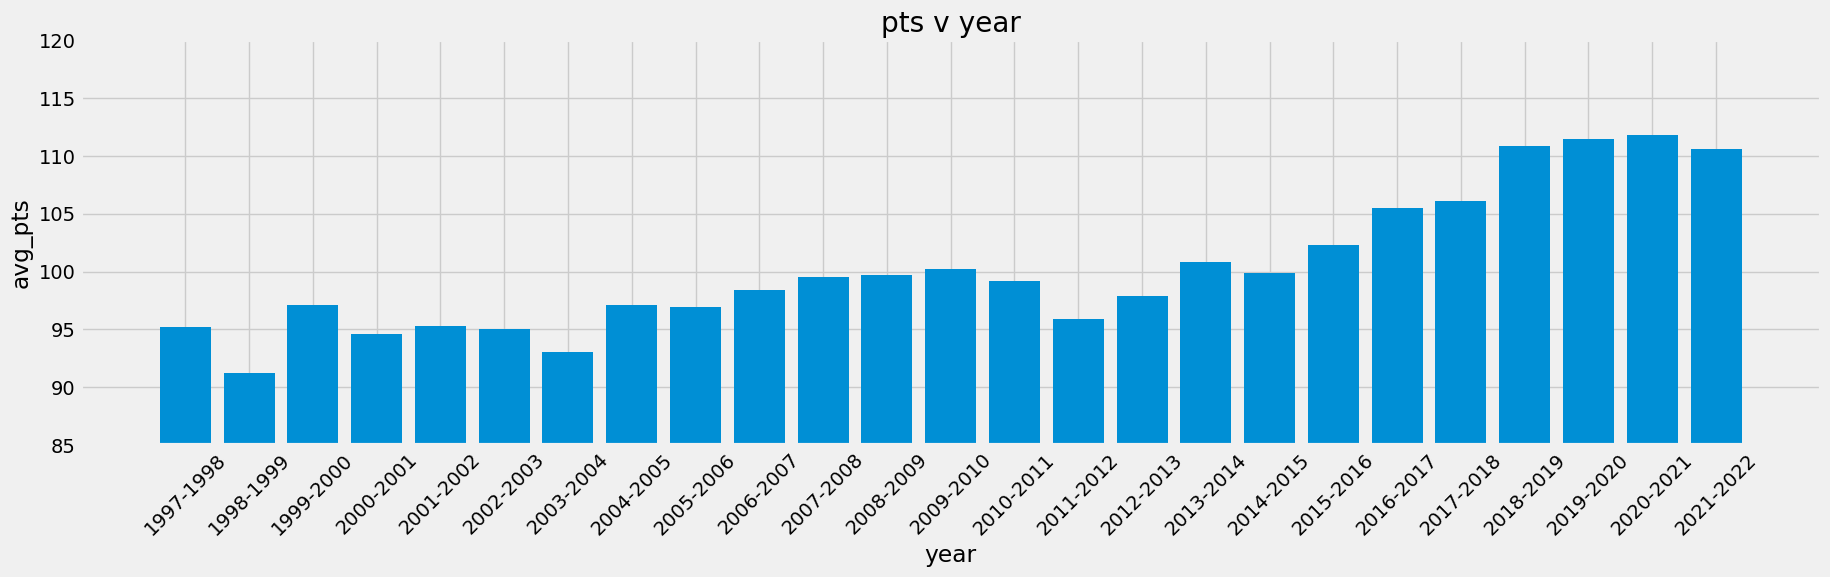

In [ ]:
plt.figure(figsize=[20, 5])
plt.bar(basketball_third['year'],basketball_third['avg_pts'])
plt.title("pts v year")
plt.xlabel('year')
plt.ylabel('avg_pts')
plt.xticks(rotation = 45)
plt.ylim(85, 120,5);

Looking at this bar graph, the average number of points scored per game for each season has had slight changes. One observation that can be made is that the last 7 seasons (2015/2016-2021/2022) have all had an average number of points scored that averaged to be greater than 100 points per game.  Could teams with a high number of average points scored have a higher chance of making it to the championship?

### **Q2:  Does defense really win championships?**

The phrase is always "Defense wins championships" so let's see if a good defense can bring you to the championship.

In [ ]:
defense = """SELECT MAX(g), team, dreb, stl, blk, dff, year
             FROM basketball
             GROUP BY year
          """
defense = pd.read_sql_query(defense, conn)
defense

,MAX(g),team,dreb,stl,blk,dff,year
0,103,Chicago,29.2,8.6,4.3,17.5,1997-1998
1,70,New York,29.9,7.8,4.9,4.9,1998-1999
2,105,L.A.Lakers,32.7,7.3,6.3,16.9,1999-2000
3,105,Philadelphia,31.3,8.3,5.0,5.3,2000-2001
4,102,New Jersey,30.6,8.6,5.9,9.0,2001-2002
5,105,San Antonio,31.6,7.7,6.5,11.9,2002-2003
6,105,Detroit,30.7,8.0,7.0,13.6,2003-2004
7,107,Detroit,30.4,7.1,6.1,11.7,2004-2005
8,105,Dallas,29.8,7.1,5.6,12.7,2005-2006
9,102,San Antonio,31.2,7.2,5.2,17.3,2006-2007


In [ ]:
best_dreb = """SELECT team, g, MAX(dreb) AS best_dreb, year
                  FROM basketball
                  GROUP BY year
              """
best_dreb = pd.read_sql_query(best_dreb, conn)
best_dreb

,team,g,best_dreb,year
0,San Antonio,91,32.2,1997-1998
1,San Antonio,67,31.4,1998-1999
2,L.A.Lakers,105,32.7,1999-2000
3,San Antonio,95,33.1,2000-2001
4,Sacramento,98,32.9,2001-2002
5,Sacramento,94,33.3,2002-2003
6,Houston,87,32.4,2003-2004
7,Miami,97,32.4,2004-2005
8,L.A.Clippers,94,33.2,2005-2006
9,Houston,89,32.5,2006-2007


In [ ]:
best_stl = """SELECT team, g, MAX(stl) AS best_stl, year
              FROM basketball
              GROUP BY year
           """
best_stl = pd.read_sql_query(best_stl, conn)
best_stl

,team,g,best_stl,year
0,Boston,82,12.0,1997-1998
1,Philadelphia,58,10.8,1998-1999
2,Boston,82,9.7,1999-2000
3,Sacramento,90,9.5,2000-2001
4,Boston,98,9.5,2001-2002
5,Philadelphia,94,9.9,2002-2003
6,Memphis,86,9.7,2003-2004
7,Philadelphia,87,9.2,2004-2005
8,Charlotte,82,10.0,2005-2006
9,Golden State,93,9.3,2006-2007


In [ ]:
best_blk = """SELECT team, g, MAX(blk) AS best_blk, year
              FROM basketball
              GROUP BY year
           """
best_blk = pd.read_sql_query(best_blk, conn)
best_blk

,team,g,best_blk,year
0,Toronto,82,8.1,1997-1998
1,San Antonio,67,6.7,1998-1999
2,Denver,82,7.5,1999-2000
3,San Antonio,95,6.9,2000-2001
4,Detroit,92,6.8,2001-2002
5,San Antonio,105,6.5,2002-2003
6,Detroit,105,7.0,2003-2004
7,Portland,82,6.6,2004-2005
8,L.A.Clippers,94,6.1,2005-2006
9,L.A.Clippers,82,5.8,2006-2007


In [ ]:
best_dff = """SELECT team, g, MAX(dff) AS best_dff, year
              FROM basketball
              GROUP BY year
           """
best_dff = pd.read_sql_query(best_dff, conn)
best_dff

,team,g,best_dff,year
0,Chicago,103,17.5,1997-1998
1,San Antonio,67,20.0,1998-1999
2,L.A.Lakers,105,16.9,1999-2000
3,Utah,87,14.9,2000-2001
4,L.A.Lakers,101,14.0,2001-2002
5,Sacramento,94,14.5,2002-2003
6,San Antonio,92,15.4,2003-2004
7,San Antonio,105,15.0,2004-2005
8,San Antonio,95,15.1,2005-2006
9,Phoenix,93,18.7,2006-2007


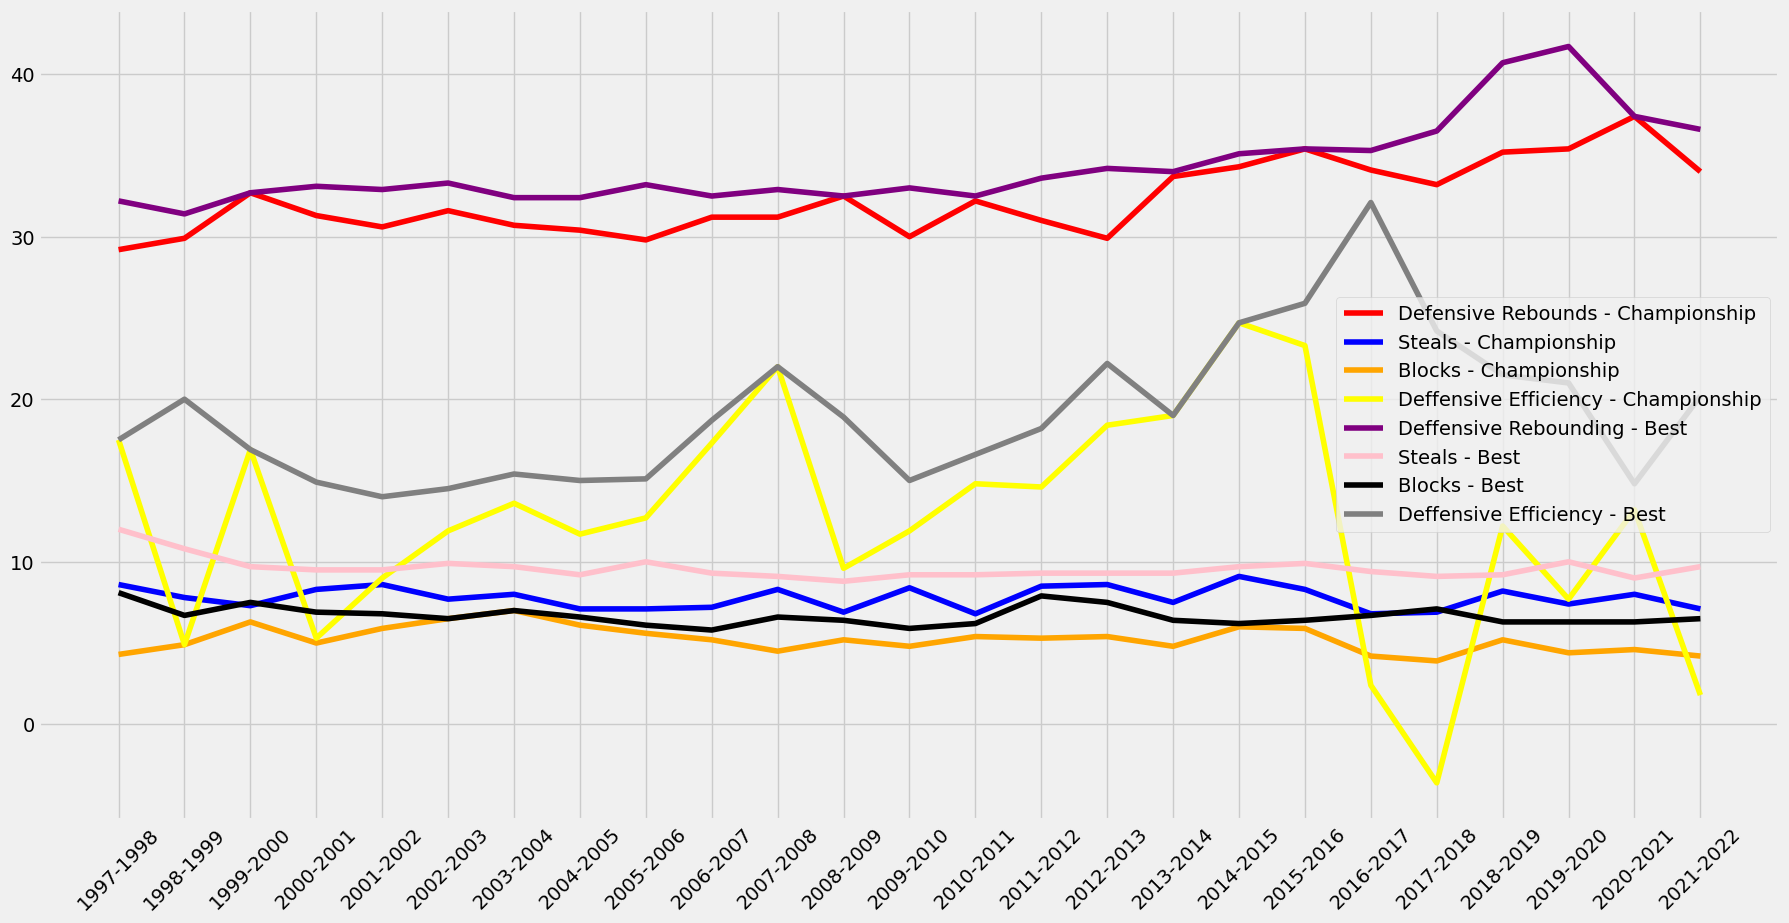

In [ ]:
plt.figure(figsize = (20, 10))
plt.plot(defense["year"], defense["dreb"], color = "red", label = "Defensive Rebounds - Championship")
plt.plot(defense["year"], defense["stl"], color = "blue", label = "Steals - Championship")
plt.plot(defense["year"], defense["blk"], color = "orange", label = "Blocks - Championship")
plt.plot(defense["year"], defense["dff"], color = "yellow", label = "Deffensive Efficiency - Championship")
plt.plot(best_dreb["year"], best_dreb["best_dreb"], color = "purple", label = "Deffensive Rebounding - Best")
plt.plot(best_stl["year"], best_stl["best_stl"], color = "pink", label = "Steals - Best")
plt.plot(best_blk["year"], best_blk["best_blk"], color = "black", label = "Blocks - Best")
plt.plot(best_dff["year"], best_dff["best_dff"], color = "gray", label = "Deffensive Efficiency - Best")
plt.xticks(rotation = 45)
plt.legend()

The above line graph tells us that there is a gap to the best defense and the team that goes to the championship. This tells us that even if you have the best defense, you still might not win it all. The biggest visual that stands out is the Deffensive Efficiency Drop in the 2017-2018 season. This team is the Cleveland Cavaliers. If you have that bad of a defense, how do you get to the championship? Our hypothesis is due to the change in offense.

### **Q3: How has the number of personal fouls per game changed with year? Has the number of personal fouls per game been part of the cause for the increase in average points scored per game?**

INCLUDE OPENING STATEMENT

In [ ]:
sql_statement = """SELECT year, AVG (pf) AS 'AVG PF', AVG(pts) as 'AVG PTS'
                   FROM basketball
                   GROUP BY year
                   """

pf_year = pd.read_sql_query(sql_statement, conn)
pf_year

,year,AVG PF,AVG PTS
0,1997-1998,22.513793,95.244828
1,1998-1999,22.410345,91.241379
2,1999-2000,23.365517,97.113793
3,2000-2001,22.389655,94.631034
4,2001-2002,21.375862,95.275862
5,2002-2003,21.937931,95.031034
6,2003-2004,21.575862,93.027586
7,2004-2005,22.730000,97.116667
8,2005-2006,22.900000,96.943333
9,2006-2007,22.230000,98.410000


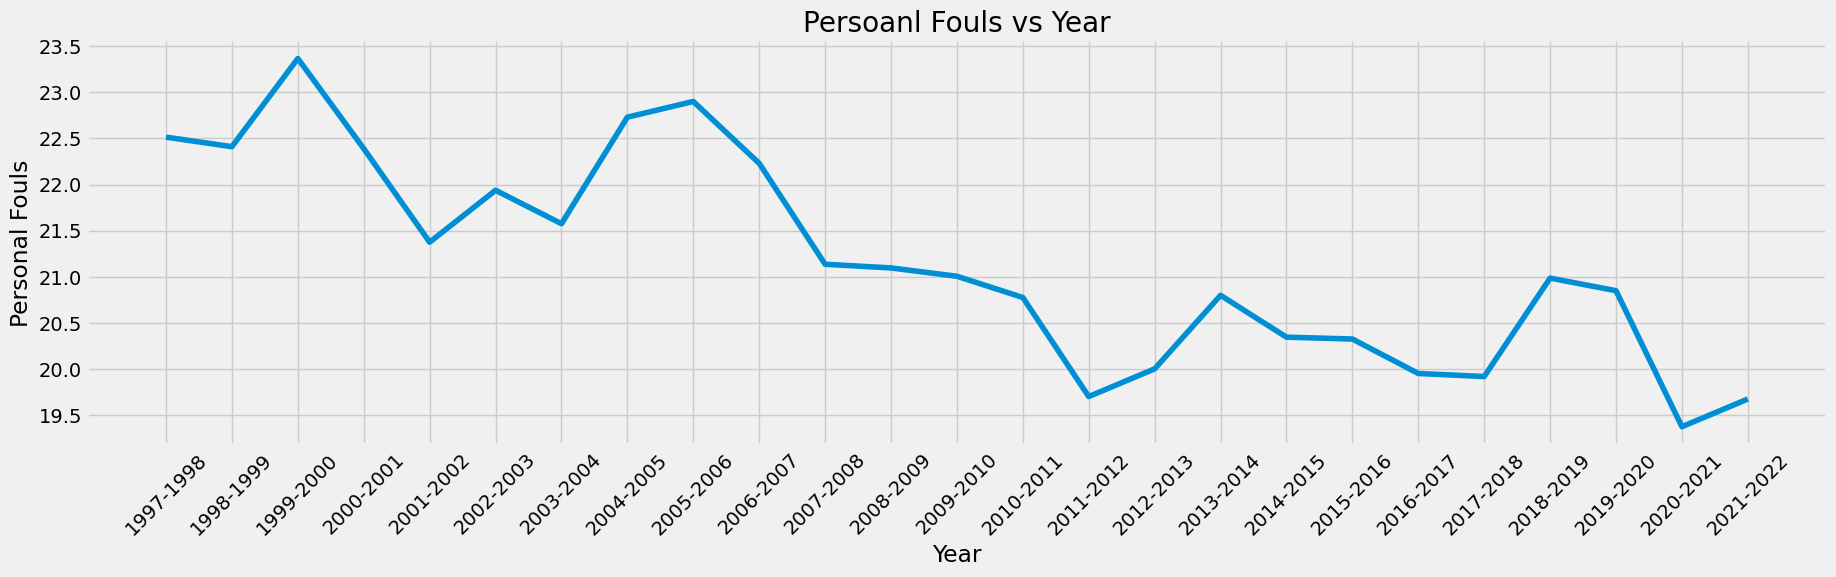

In [ ]:
plt.figure(figsize=[20, 5])
plt.plot(pf_year['year'],pf_year['AVG PF'])
plt.title("Persoanl Fouls vs Year")
plt.xlabel('Year')
plt.ylabel('Personal Fouls')
plt.xticks(rotation = 45);

This line graph shows that the average number of personal fouls per game per year has seen a decrease. The lack of increase in personal fouls, hints that points from personal fouls are not adding to the increase in the average number of points scored per game.

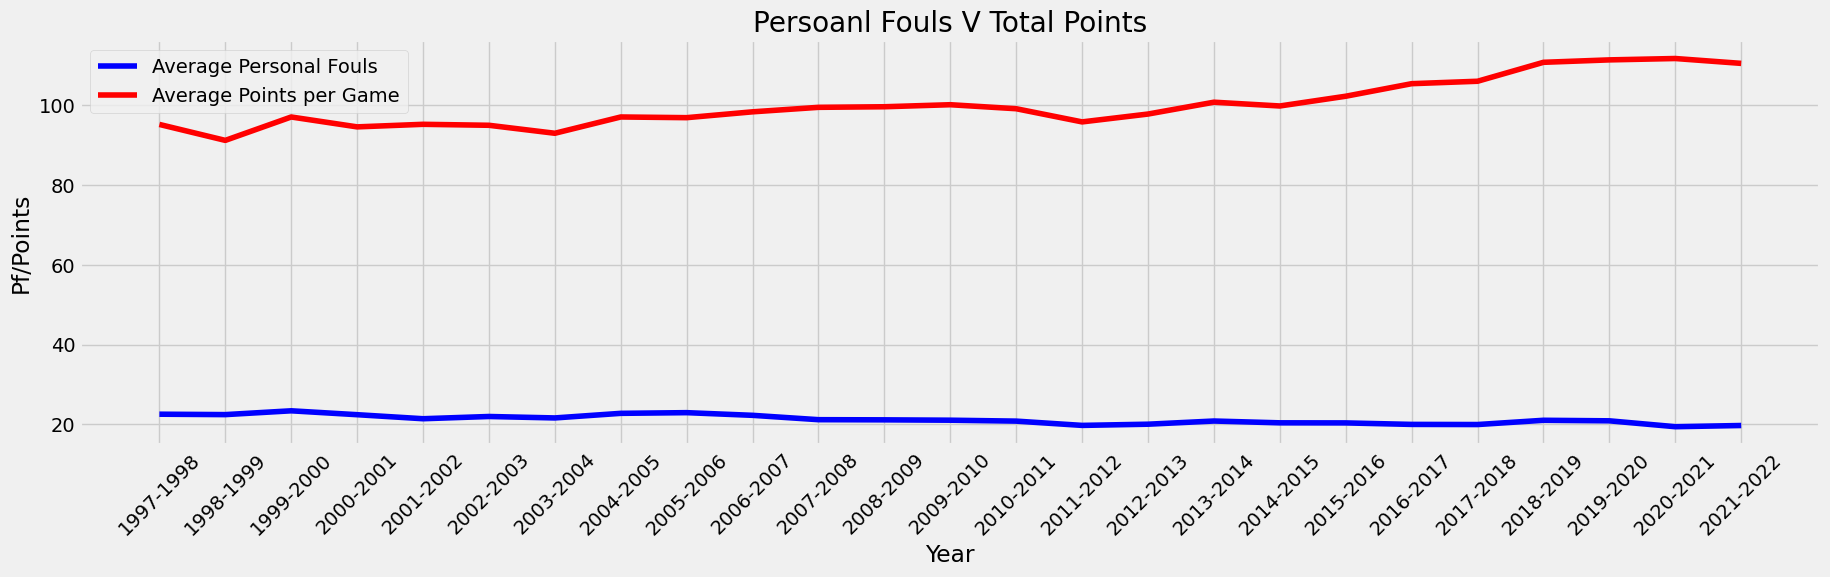

In [ ]:
plt.figure(figsize=[20, 5])
plt.plot(pf_year['year'], pf_year['AVG PF'], color = 'blue', label = "Average Personal Fouls")
plt.plot(pf_year['year'], pf_year['AVG PTS'], color = 'red', label = "Average Points per Game")
plt.title("Persoanl Fouls V Total Points")
plt.xlabel('Year')
plt.ylabel('Pf/Points')
plt.legend()
plt.xticks(rotation = 45);

This line graph shows that the average number of personal fouls per year has seen a decrease. With a lack of increase in personal fouls, we can conclude that points from personal fouls are not adding to the increase in the average number of points scored per game.

In [ ]:
new_corr = pf_year.corr(numeric_only=True)
new_corr ["AVG PTS"]["AVG PF"]

-0.6152633927916041

We see that the correlation coefficent betweem average points and average personal fouls is -0.613592. There is a somewhat strong negative correlation between average points scored and personal fouls. This concludes that an increase in personal fouls have not been a cause for the increase in the number of points scored per game over time. The decrease seen in personal fouls means that fouls are contributing less to the total points in a a game. Knowing this information, we will now investigate other factors that could be the cause for the increase in points scored per game. Specifcally, we will now look into if there has been an increase in 3-point shots made.

### **Q4: Has there been an increase in the number of 3-pointers made per game? What were each team's 3 point percentage and 3 pointer's attemtped and made per game?**

In [ ]:
sql_statement = """SELECT year, AVG ("3gm_a") AS 'AVG 3-Pointers', AVG(pts) AS 'AVG PTS'
                   FROM basketball
                   GROUP BY year
                   """

basketball_five = pd.read_sql_query(sql_statement, conn)
basketball_five

,year,AVG 3-Pointers,AVG PTS
0,1997-1998,4.406897,95.244828
1,1998-1999,4.458621,91.241379
2,1999-2000,4.851724,97.113793
3,2000-2001,4.855172,94.631034
4,2001-2002,5.200000,95.275862
5,2002-2003,5.172414,95.031034
6,2003-2004,5.175862,93.027586
7,2004-2005,5.590000,97.116667
8,2005-2006,5.703333,96.943333
9,2006-2007,6.060000,98.410000


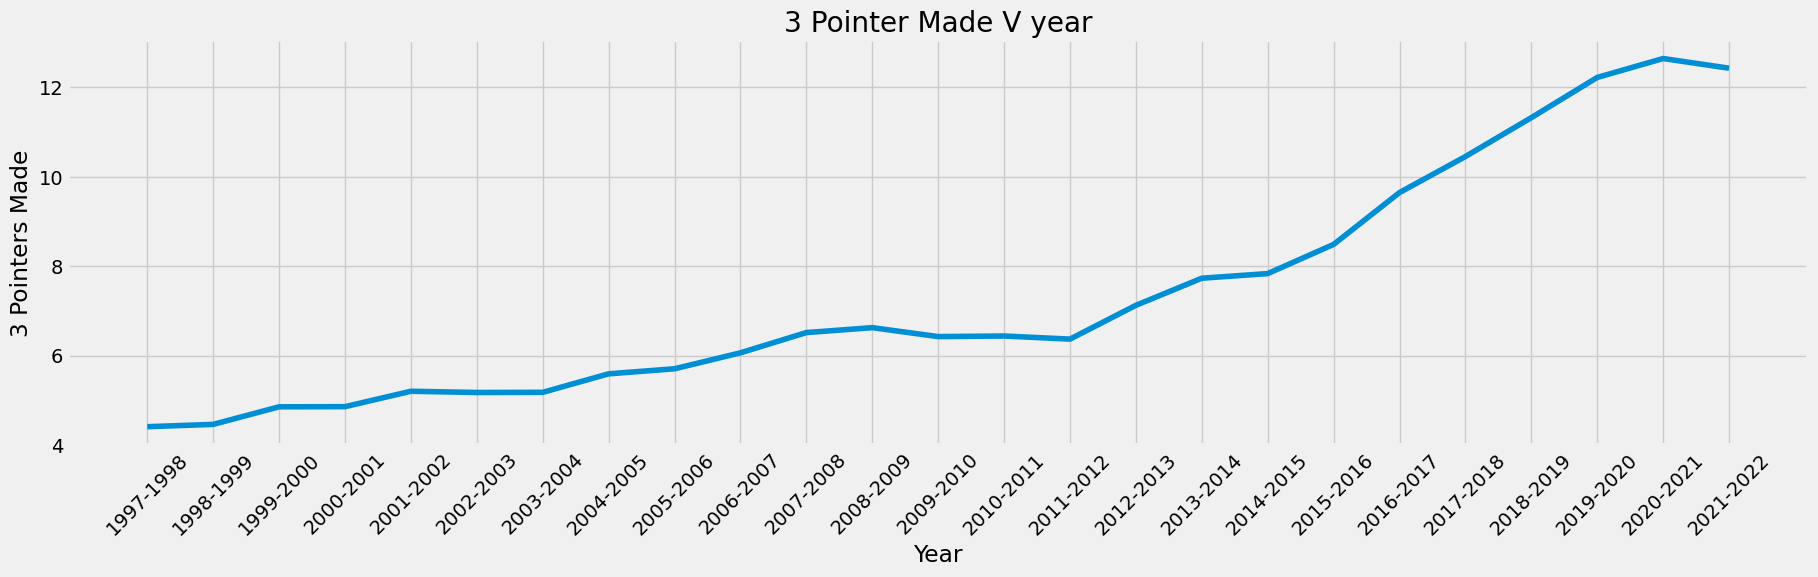

In [ ]:
plt.figure(figsize=[20, 5])
plt.plot(basketball_five['year'],basketball_five['AVG 3-Pointers'])
plt.title("3 Pointer Made V year")
plt.xlabel('Year')
plt.ylabel('3 Pointers Made')
plt.xticks(rotation = 45);

There has been an increase in the number of made 3-point shots over the years. Following the 2011-2012 season there was the most significant increase, which has been followed by a plateau that started in the 2018-2019 season.

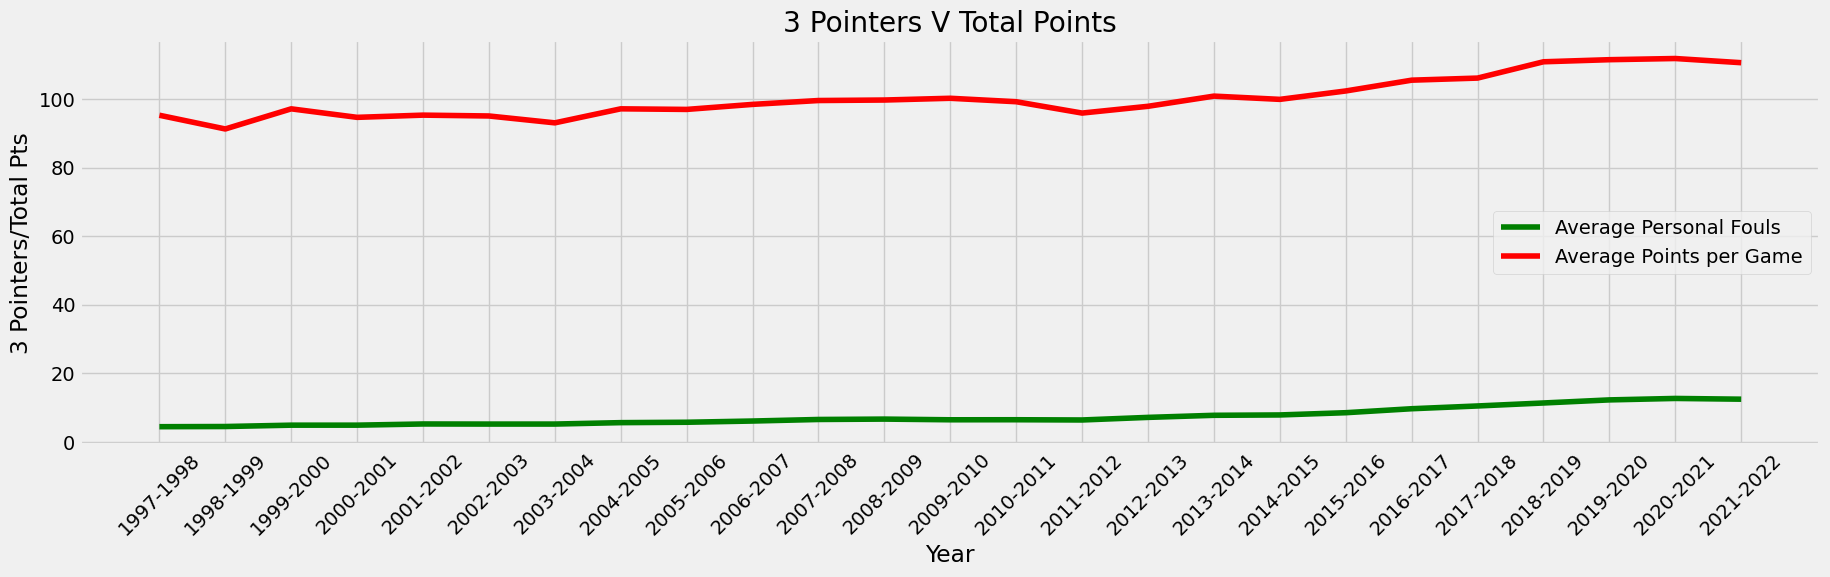

In [ ]:
plt.figure(figsize=[20, 5])
plt.plot(basketball_five['year'], basketball_five['AVG 3-Pointers'], color = 'green', label = "Average Personal Fouls")
plt.plot(basketball_five['year'], basketball_five['AVG PTS'], color = 'red', label = "Average Points per Game")
plt.title("3 Pointers V Total Points")
plt.xlabel('Year')
plt.ylabel('3 Pointers/Total Pts')
plt.legend()
plt.xticks(rotation = 45);

In [ ]:
new_corr = basketball_five.corr(numeric_only=True)
new_corr ["AVG PTS"]["AVG 3-Pointers"]

0.9724808958246285

When put together, 3 pointers and points scored per game have a very strong positive correlation. The 0.972 correlation is very close to 1 meaning that the correlation is almost perfect. The increase in 3 Point Shots that are being made per game is the main factor that has led to more points being scored in an NBA game. Now we will look into the accuracy of 3 point shots that are being taken.

The code used is going to pull 3 historical NBA teams 3 point percentage and 3 pointer's attempted and made per game.

In [ ]:
historical_3pt = """ SELECT team, year, "pct.1", "3gm_a"
                     FROM basketball
                     WHERE (year = '1997-1998' AND team = 'Chicago') OR
                           (year = '2015-2016' AND team = 'Cleveland') OR
                           (year = '2015-2016' AND team = 'Golden State')
                 """

historical_3pt = pd.read_sql_query(historical_3pt, conn)
historical_3pt = pd.concat([historical_3pt, historical_3pt["3gm_a"].str.split("-", expand=True)], axis = 1)
historical_3pt = historical_3pt.rename(columns = {0:"3pt_made", 1:"3pt_attempted"})
historical_3pt['3pt_made'] = pd.to_numeric(historical_3pt['3pt_made'])
historical_3pt['3pt_attempted'] = pd.to_numeric(historical_3pt['3pt_attempted'])
historical_3pt = historical_3pt.sort_values(by="3pt_attempted", ascending=False)
historical_3pt

,team,year,pct.1,3gm_a,3pt_made,3pt_attempted
1,Golden State,2015-2016,0.410,13.0-31.8,13.0,31.8
2,Cleveland,2015-2016,0.372,11.0-29.7,11.0,29.7
0,Chicago,1997-1998,0.323,3.9-12.0,3.9,12.0


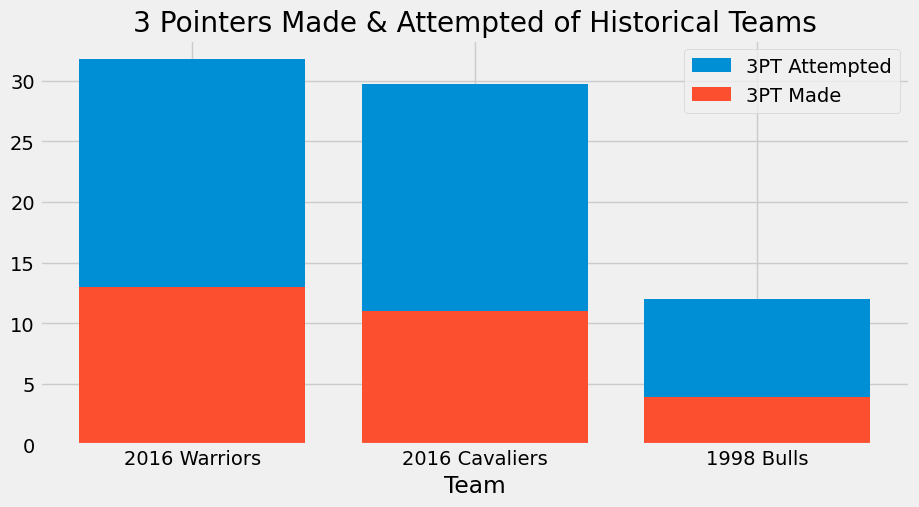

In [ ]:
plt.figure(figsize=(10,5))
xaxis_labels=["2016 Warriors", "2016 Cavaliers", "1998 Bulls"]
plt.bar(xaxis_labels, historical_3pt["3pt_attempted"], label = "3PT Attempted")
plt.bar(xaxis_labels, historical_3pt["3pt_made"], label = "3PT Made")
plt.title('3 Pointers Made & Attempted of Historical Teams')
plt.xlabel('Team')
plt.legend(loc = 'upper right');

The sport of Basketball throughout history has produced some of the best entertainment the world has ever seen. People has reason to believe that the best entertainment was with, arugably, the best NBA team ever included Michael Jordan with the 1998 Chicago Bulls who capped off one of the best dynasty's created in sports winning his and their 6th NBA Championship, along with completeing a 2nd 3-peat. As time passed on, basketball changed drastically to a more 3 point driven game where Wardell Stephen Curry and the 2016 Golden State Warriors threw made their case as the best NBA team ever. Seemingly, the Bulls are still regarded to be better because they were able to win the NBA Finals whereas the Warriors lost, up 3 games to 1, to LeBron James and the 2016 Cleveland Cavaleirs in 7 games.

The visualization of this bar graph with the three teams showed the 3 point shot has become a priority within the game over time and was not a priority during the 90's made over time. We then also began to wonder, how has offensive scoring and efficiency changed over time?

### **Q5: For each year of the dataset, what teams had the highest average points per game that season and what was their offensive efficiency? Then, find what teams had the lowest average points per game that season and what was their offensive efficiency?**

The code use during this question will be going to pull the year, the team who had the maxiumum & minimum average points per game that year, and their offensive efficiency of that team. The code is also grouped by year.

In [ ]:
max_pts = """ SELECT year, team AS team_with_max_pts, pts, eff
                    FROM basketball AS outer
                    WHERE pts =
                      (SELECT MAX(pts)
                      FROM basketball AS inner
                      GROUP BY year
                      HAVING outer.year = inner.year)
          """

max_pts = pd.read_sql_query(max_pts, conn)
max_pts

,year,team_with_max_pts,pts,eff
0,1997-1998,L.A.Lakers,104.8,120.8
1,1998-1999,Sacramento,99.3,108.0
2,1999-2000,Sacramento,104.5,116.2
3,2000-2001,Sacramento,101.4,116.0
4,2001-2002,Dallas,105.6,119.6
5,2002-2003,Dallas,103.2,118.8
6,2003-2004,Dallas,104.9,122.9
7,2004-2005,Phoenix,110.7,126.1
8,2005-2006,Phoenix,108.1,125.2
9,2006-2007,Phoenix,109.5,126.4


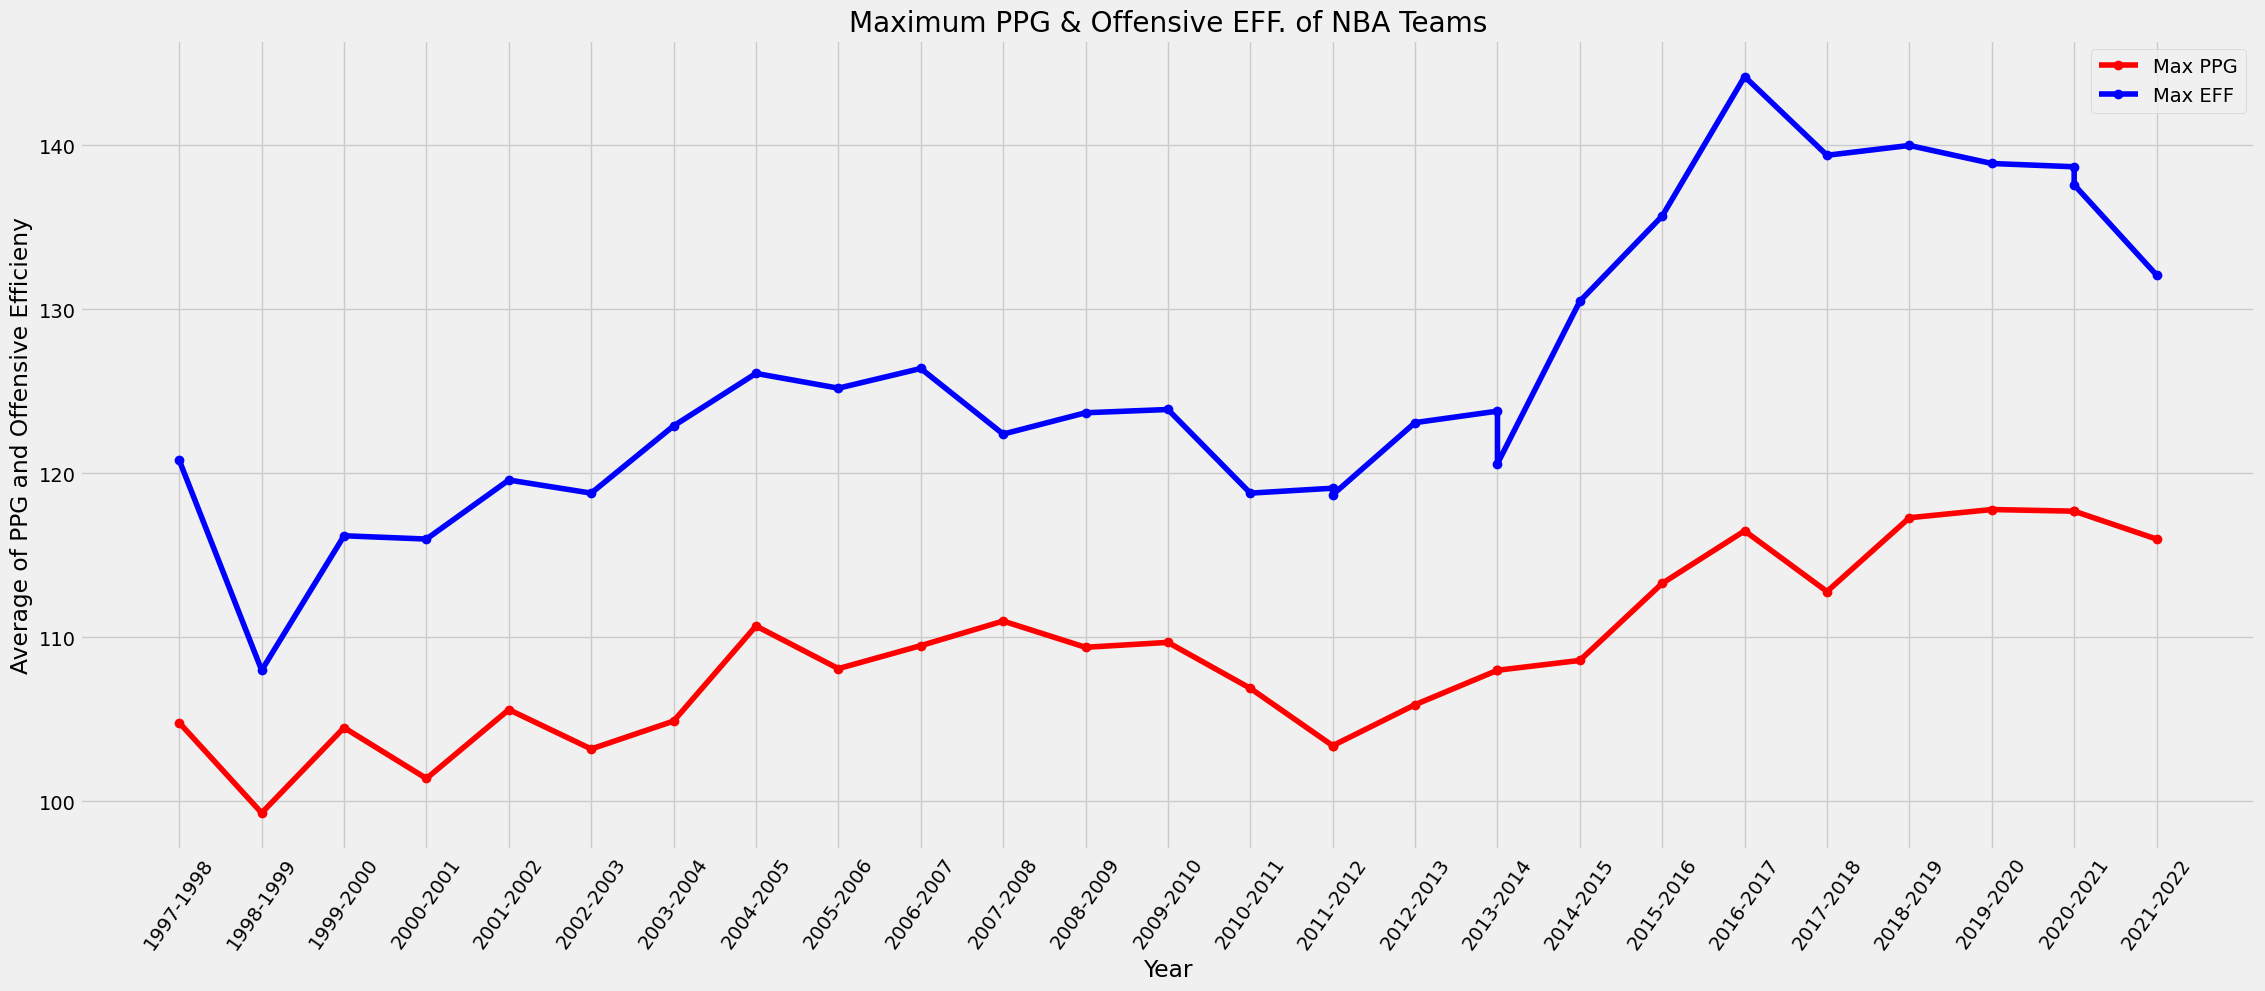

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(max_pts["year"], max_pts["pts"], label = "Max PPG", color = 'red', marker = 'o')
plt.plot(max_pts["year"], max_pts["eff"], label = "Max EFF", color = 'blue', marker = 'o')
plt.title('Maximum PPG & Offensive EFF. of NBA Teams')
plt.xlabel('Year')
plt.ylabel('Average of PPG and Offensive Efficieny')
plt.xticks(rotation=55)
plt.legend()

In [ ]:
new_corr = max_pts.corr(numeric_only = True)
new_corr
r_iris_max_pts = new_corr["pts"]["eff"]
r_iris_max_pts

0.9264283539806749

In [ ]:
min_pts = """ SELECT year, team AS team_with_min_pts, pts, eff
                    FROM basketball AS outer
                    WHERE pts =
                      (SELECT MIN(pts)
                      FROM basketball AS inner
                      GROUP BY year
                      HAVING outer.year = inner.year)
          """
min_pts = pd.read_sql_query(min_pts, conn)
min_pts

,year,team_with_min_pts,pts,eff
0,1997-1998,Golden State,88.3,96.0
1,1998-1999,Chicago,81.9,86.2
2,1999-2000,Chicago,84.8,89.3
3,2000-2001,Chicago,87.6,95.7
4,2001-2002,Miami,87.2,98.2
5,2002-2003,Denver,84.2,90.4
6,2003-2004,Toronto,85.4,93.1
7,2004-2005,New Orleans,88.4,94.2
8,2005-2006,Portland,88.8,93.0
9,2006-2007,Atlanta,93.7,101.0


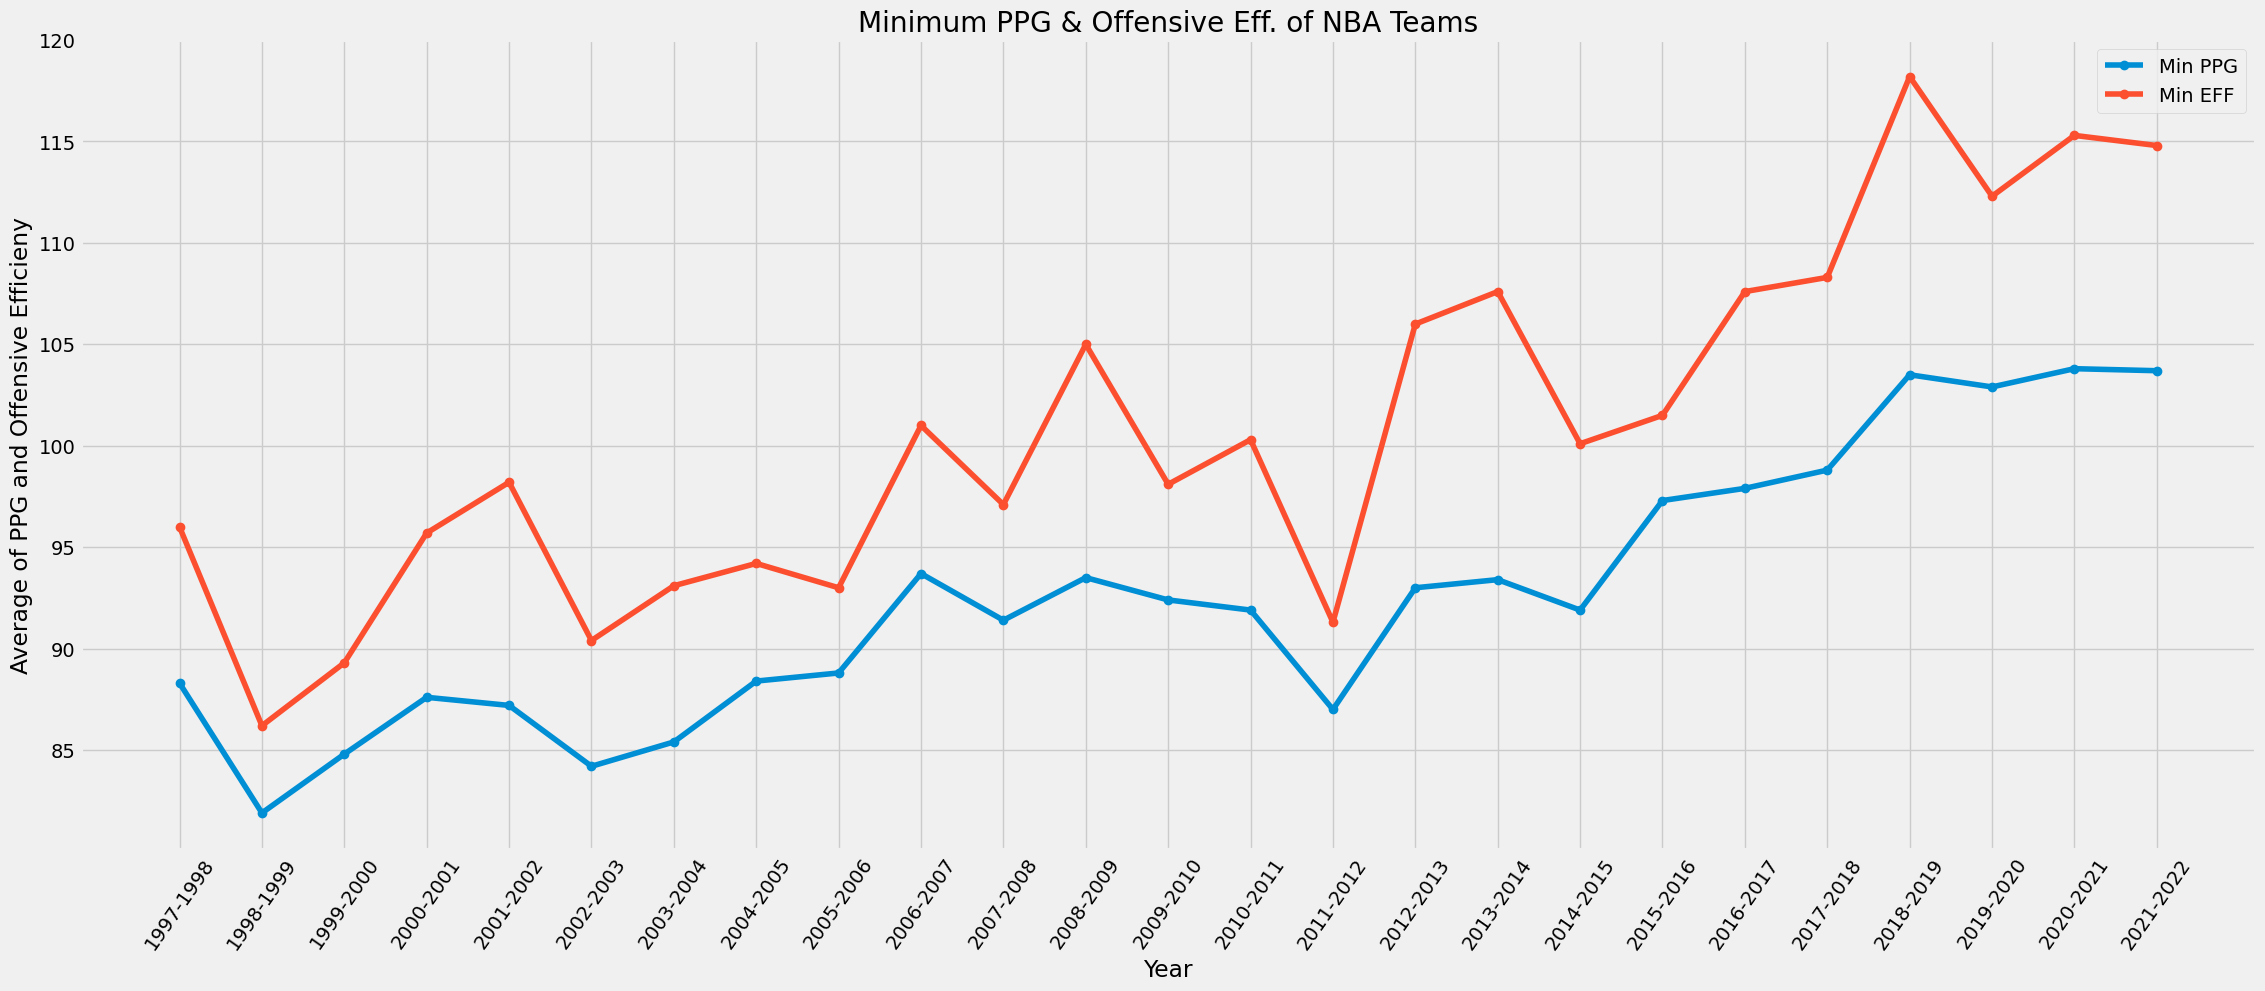

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(min_pts["year"], min_pts["pts"], label = "Min PPG", marker = 'o')
plt.plot(min_pts["year"], min_pts["eff"], label = "Min EFF", marker = 'o')
plt.title('Minimum PPG & Offensive Eff. of NBA Teams')
plt.xlabel('Year')
plt.ylabel('Average of PPG and Offensive Efficieny')
plt.xticks(rotation=55)
plt.legend()

In [ ]:
new_corr = min_pts.corr(numeric_only = True)
new_corr
r_iris_min_pts = new_corr["pts"]["eff"]
r_iris_min_pts

0.9546060734544708

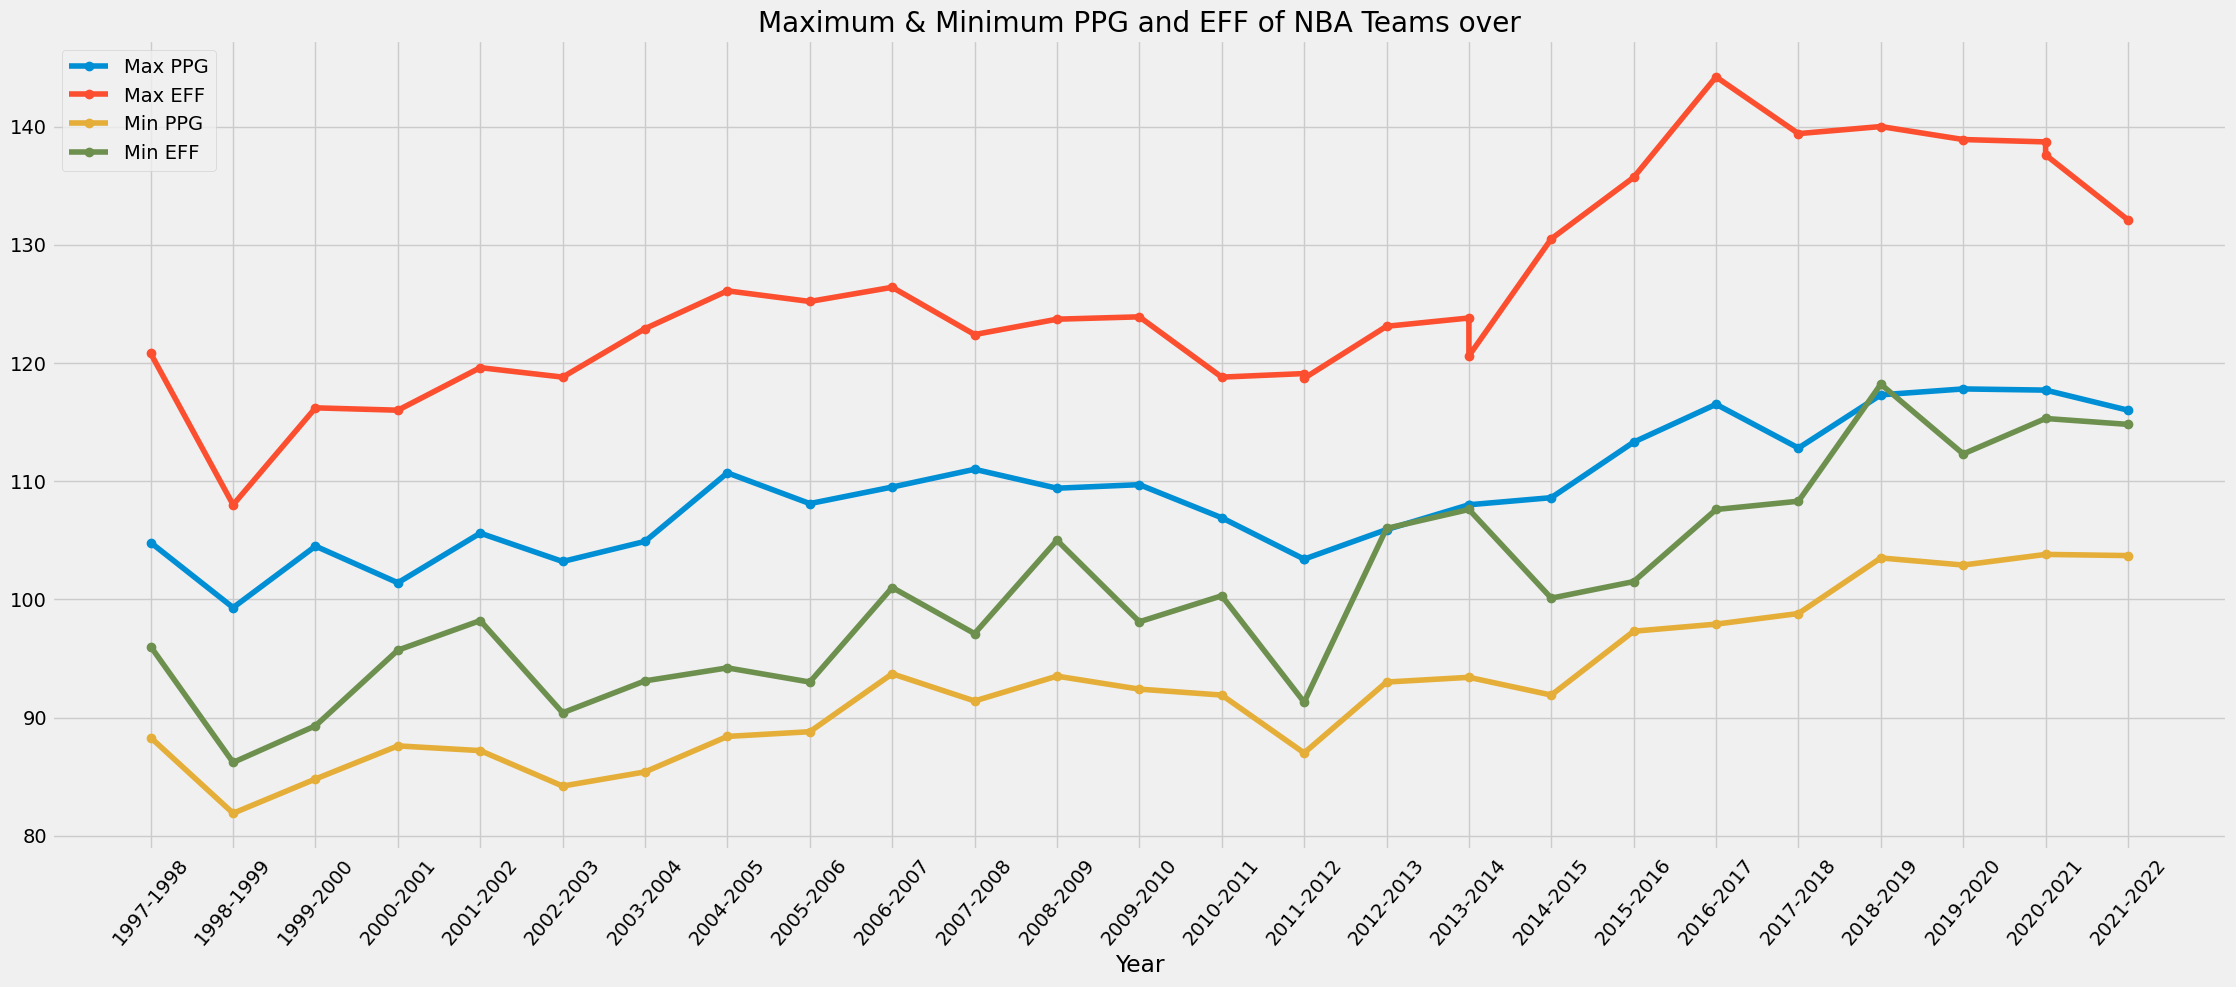

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(max_pts["year"], max_pts["pts"], label = "Max PPG", marker = 'o')
plt.plot(max_pts["year"], max_pts["eff"], label = "Max EFF", marker = 'o')
plt.plot(min_pts["year"], min_pts["pts"], label = "Min PPG", marker = 'o')
plt.plot(min_pts["year"], min_pts["eff"], label = "Min EFF", marker = 'o')
plt.title('Maximum & Minimum PPG and EFF of NBA Teams over')
plt.xlabel('Year')
plt.xticks(rotation=50)
plt.legend()

From the visualization of this combined line graph, we can see the is a gradual increase of BOTH the maximum and minimum of average points scored per game and offensive efficiency. From observation, you can see that is these lines, between maximum and minimum of average points per game & offensive efficiency, increase and decrease each year at a very similar rate. Our next thought then became if the worst teams are scoring more points, why are they not winning more?

### Q6:  **Does Money Buy Wins?**

Since the dataset does not include wins, we will discover if money can make your team better.

In [ ]:
sum_salary = """
                SELECT s.season, SUM(s.salary) AS sum_salary,
                                 AVG(b.pts) AS avg_pts,
                                 AVG(b.eff) AS avg_eff,
                                 AVG(b.dff) AS avg_dff
                FROM basketball b
                    JOIN salary s
                        ON substr(b.team, 1, 4) = substr(s.team, 1, 4) AND
                          substr(b.year, 1, 4) = s.season_start
                GROUP BY s.season
             """
sum_salary = pd.read_sql_query(sum_salary, conn)
sum_salary

,season,sum_salary,avg_pts,avg_eff,avg_dff
0,1997-98,1036198655,95.142463,106.145011,-0.821444
1,1998-99,1178441809,90.966309,100.260086,-1.338197
2,1999-00,1471435636,96.934464,108.214464,-1.168750
3,2000-01,1673115886,94.264257,105.452008,-0.977309
4,2001-02,1740201490,95.104260,107.261258,-0.579513
5,2002-03,2085840272,94.966485,106.226412,0.034608
6,2003-04,2103378493,92.513036,103.614286,-0.285357
7,2004-05,2219102362,96.250957,106.293913,-2.000696
8,2005-06,2386606244,96.419360,105.525926,-1.351347
9,2006-07,2427121774,98.085033,107.439638,-1.369079


In the above table, we learn that the salary for players has increased **dramatically**. This could be due to an increase in inflation throughout the years or also the fact that the NBA has grown in popularity, which increases revenue.

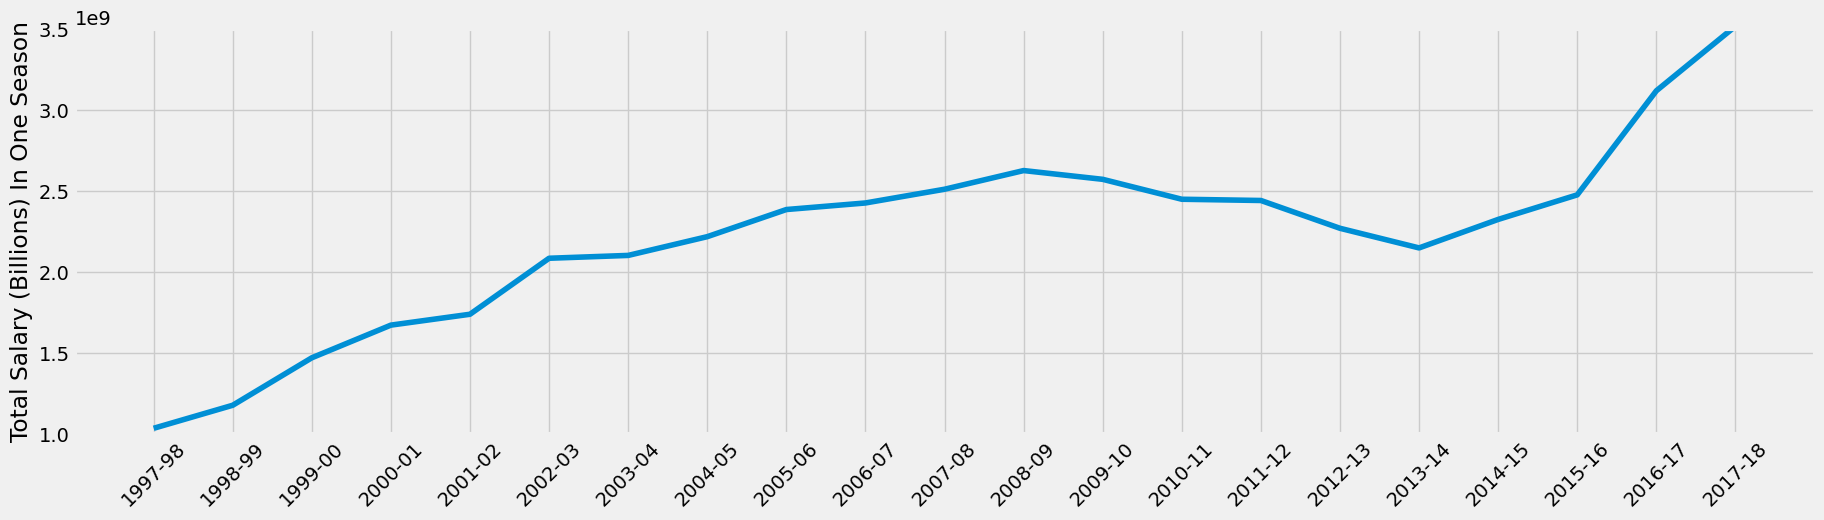

In [ ]:
plt.figure(figsize = (20,5))
plt.plot(sum_salary["season"], sum_salary["sum_salary"])
plt.ylabel("Total Salary (Billions) In One Season")
plt.ylim(1000000000, 3500000000)
plt.xticks(rotation = 45);


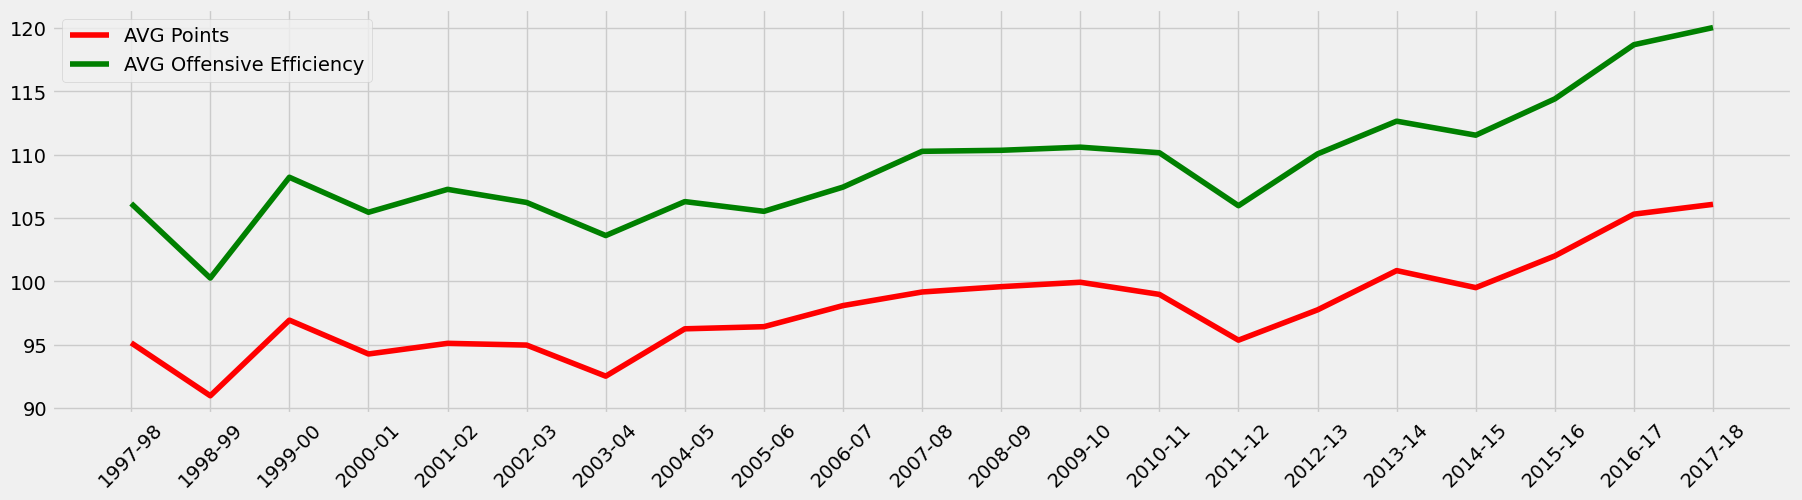

In [ ]:
plt.figure(figsize = (20,5))
plt.plot(sum_salary["season"], sum_salary["avg_pts"], color = "red", label = "AVG Points")
plt.plot(sum_salary["season"], sum_salary["avg_eff"], color = "green", label = "AVG Offensive Efficiency")
plt.legend()
plt.xticks(rotation = 45);

If you take a look at both graphs simultaneously, we can see an increase of salary throughout the league as well as an increase in points. After the 2012-2013 season, the points and salary look to have a dramatic increase which leads us to ask, will we eventually see the league total salary reach 4 Billion $? And will we see teams score closer to 130-140 points per game?

---

## Conclusion

After answering the questions that we had, we can better interpret trends in the NBA from our findings. We now know that the number of points scored in an NBA game has seen an increase over time. After further investigating, we came to the conclusion that an increase in 3-point shots being taken and made is a leading factor for this increase. We compared the salaries of NBA players with our joined dataset to learn that salaries have significantly increased overtime. If we were able to have more time on this project, we think that data on the amounmt of players on each roster may have been interesting to see if there was a relationship with this and our original data.   